Ground Truth :  [101]  +  [52]  =  [153]
Predictions  :  [255]
-----------------------------------------
Ground Truth :  [73]  +  [97]  =  [170]
Predictions  :  [130]
-----------------------------------------
Ground Truth :  [19]  +  [61]  =  [80]
Predictions  :  [47]
-----------------------------------------
Ground Truth :  [74]  +  [38]  =  [112]
Predictions  :  [4]
-----------------------------------------
Ground Truth :  [107]  +  [45]  =  [152]
Predictions  :  [222]
-----------------------------------------
Ground Truth :  [114]  +  [0]  =  [114]
Predictions  :  [114]
-----------------------------------------
Ground Truth :  [61]  +  [47]  =  [108]
Predictions  :  [108]
-----------------------------------------
Ground Truth :  [23]  +  [42]  =  [65]
Predictions  :  [65]
-----------------------------------------
Ground Truth :  [38]  +  [103]  =  [141]
Predictions  :  [141]
-----------------------------------------
Ground Truth :  [61]  +  [74]  =  [135]
Predictions  :  [135]
-----

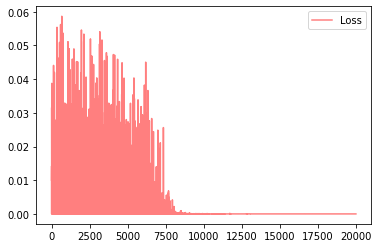

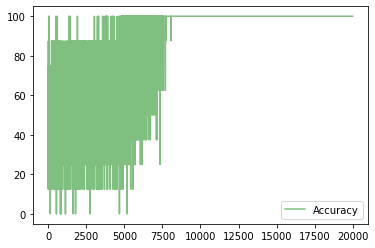

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.special import expit

def sigmoid(z):
	return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
	return z * (1 - z)

def tanh(z):
	return np.tanh(z)

def tanh_derivative(z):
	return 1 - np.square(z)

values_map = dict()
binary_dim = 8
values = np.arange(0, 2**8, 1, dtype=np.uint8).reshape((-1, 1))
values = np.unpackbits(values, axis=1)

for i in range(2**binary_dim):
	values_map[i] = values[i, :]

wa = 2*np.random.random((20, 20))-1
wx = 2*np.random.random((20, 2))-1
wy = 2*np.random.random((1, 20))-1

d_wa = np.zeros_like(wa)
d_wx = np.zeros_like(wx)
d_wy = np.zeros_like(wy)

hidden = dict()
output = np.zeros((1, binary_dim))
error = np.zeros_like(output)
hidden[8] = np.zeros((20, 1))
daprev = np.zeros_like(hidden[8])
hd = np.zeros_like(hidden[8])
loss, accuracy = [], []

epochs = 20000
lr = 0.1

for _ in range(1, epochs+1):

	a = np.random.randint(0, 2**binary_dim/2)
	b = np.random.randint(0, 2**binary_dim/2)
	c = a + b
	a = values_map[a]
	b = values_map[b]
	c = values_map[c]
	err = 0
	acc = 0

	for t in range(binary_dim)[::-1]:

		x = np.array([[a[t]], [b[t]]])
		hidden[t] = sigmoid(np.matmul(wa, hidden[t+1]) + np.matmul(wx, x))
		output[0, t] = sigmoid(np.matmul(wy, hidden[t]))
		error[0, t] = (c[t].astype(int) - output[0, t])*(sigmoid_derivative(output[0, t]))*(-1)
		err += np.squeeze(error[0, t])
		if c[t]==np.squeeze(np.round(output[0, t])):
			acc += 1

	loss.append((err**2/2)/binary_dim)
	accuracy.append((acc/binary_dim)*100)

	if not _%1000:
		print("Ground Truth : ", np.packbits(a), " + ", np.packbits(b), " = ", np.packbits(c))
		print("Predictions  : ", np.packbits(np.round(output).astype(int)))
		print("-----------------------------------------")

	
	for t in range(binary_dim):

		x = np.array([[a[t]], [b[t]]])
		yhat = np.array([[error[0, t]]])
		da = (daprev + np.matmul(wy.T, yhat))*sigmoid_derivative(hidden[t])
		d_wy += np.matmul(yhat, hidden[t].T)
		d_wx += np.matmul(da, x.T)
		d_wa += np.matmul(da, hidden[t+1].T)
		daprev = np.matmul(wa.T, da)

	wa -= d_wa * lr
	wx -= d_wx * lr
	wy -= d_wy * lr
	
	d_wa *= 0 
	d_wx *= 0
	d_wy *= 0
	
plt.figure(1)
plt.plot(loss, label="Loss", color='red', alpha=0.5)
plt.legend()
plt.figure(2)
plt.plot(accuracy, label="Accuracy", color='green', alpha=0.5)
plt.legend()